Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

In [397]:
NAME = "Thomas Tang"
COLLABORATORS = ""

## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
* The detailed explanation of the logic of the analysis _(2 points)_

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.


In [398]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

#-------------------------------
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

for dirname, _, filenames in os.walk('./input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

./input/train.csv


In [399]:
df = pd.read_csv("./input/train.csv")  #open file to read data
df.set_index('PassengerId')            #set index using PassengerId as unique primary key
df.head()                              #display data layout with examples on top rows 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [400]:
# display data type (Dtype) of all attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [401]:
# display major statistics
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [402]:
# Q4
# A4: data cleasing prior to analysis, to discover NaN that may affect calculation in assumption: Age/Cabin/Embarked
#     Age: I calculate it in 2 ways to handle the NaN. Mean of ALL passengers; Mean of ONLY survival passengers
#     Cabin: I don't think this is within consideration of calculation becasue the NaN 177/891 is too high
#     Embarked: Only 2/891 are NaN.
#
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [403]:
# setup some variables to be used 

# This calculate the mean Age of ALL passengers
df_temp = df.describe()
myMeanAge = df_temp.loc['mean']['Age']
print ('mean age of ALL passengers:', myMeanAge)



# This calculate the mean Age of passengers ONLY survived
df1 = df[ (~(df["Age"].isnull())) & (df["Survived"]==1) ].mean(numeric_only=True)
#df[ (~(df["Age"].isnull()) & (df["Survived"]==1)) ].mean()
#print (df1)
#print(df1.axes)
#print ('Mean age of survived:', df1[3])
print ('mean age of ONLY survived:', df1.loc['Age'])

myMaxNumPassenger = df_temp.loc['max']['PassengerId']
print ('max# passengers', myMaxNumPassenger)

mean age of ALL passengers: 29.69911764705882
mean age of ONLY survived: 28.343689655172415
max# passengers 891.0


In [404]:
# Q4 
# create 1 extra columns on far right, copy from column Age while still having value of NaN
df['AgeWithMeanSurvived'] = df['Age']

In [405]:
# Q4 
# to fill all NaN on Age column, eg. index 888, with mean 29.69918
df["Age"].fillna(myMeanAge)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [406]:
# Q4 
# create a new column replace NaN and storing mean age values (feature engineering)
# to fill all NaN on Age column, eg. index 888, with mean 28.3469 (df1.loc['Age']) of those only survived
df["AgeWithMeanSurvived"].fillna(df1.loc['Age'])

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    28.34369
889    26.00000
890    32.00000
Name: AgeWithMeanSurvived, Length: 891, dtype: float64

Q1: What categories of passengers were most likely to survive the Titanic disaster? (2 points)
    The detailed explanation of the logic of the analysis (2 points)
    
A1: It is a struggle in selection of attributes of where to get started. Inspired by the movie Titanic, at the sinking scene where Woman and Child were allowed onboarding to life safing boat in higer priroty. Therefore, I selected "Sex" as my primary attribute in filtering, where "Parch" as the secondary and the remainings as n-ary.

In [407]:
#survivedAll = df[(df['Survived']==1)].value_counts()
#rateAll = survivedAll/myMaxNumPassenger
#print("rate of survived:", rateAll)

women = df.loc[df.Sex == 'female']["Survived"]
men = df.loc[df.Sex == 'male']["Survived"]
totalNumWomenSurvived = sum(women)
totalNumMenSurvived = sum(men)

print ("totol #survived women:", totalNumWomenSurvived)  #sum(women))
print ("totol #survived men:", totalNumMenSurvived)  #sum(men))
print ("total #passengers", myMaxNumPassenger)
rate_women = sum(women)/myMaxNumPassenger  #len(women)
rate_men = sum(men)/myMaxNumPassenger     #len(men)
print("rate of survived (women):", rate_women)
print("rate of survived (men):", rate_men)



totol #survived women: 233
totol #survived men: 109
total #passengers 891.0
rate of survived (women): 0.2615039281705948
rate of survived (men): 0.122334455667789


Q2: What other attributes did you use for the analysis? Explain how you used them and why you decided to use them.
    Provide a complete list of all attributes used. (3 points)

A2: From the result above, we could confirm Women has a higher survival rate than Men. Therefore, I continue the filter process by using Women to narrow down in addition to use other attributes to calculate the overall survival rate Women by adpoting the idea of probability where its value is lying between 0 to 1. Now, Question 1 has become the question of what attibutes made women have a higher survial rate? I am going to demonstrate by "Parch", "PClass", "Age", "SibSp", "Fare" and "Embarked".

In [416]:
print("------------------------------------------")
print("[survival female + Parch]:")
#parch0 = sum( (df.loc[df.Sex == 'female'] & df.loc[df.Parch == 0])['Survived'] )  #df.loc[df.Sex == 'female']["Survived"]
#parch0 = sum(df[ (df['Sex']=='female') & (df['Parch']=='0') ]['Survived'])
print("female + parch(0):", sum(df[ (df['Sex']=='female') & (df['Parch']==0) ]['Survived'])/totalNumWomenSurvived)
print("female + parch(1):", sum(df[ (df['Sex']=='female') & (df['Parch']==1) ]['Survived'])/totalNumWomenSurvived)
print("female + parch(2):", sum(df[ (df['Sex']=='female') & (df['Parch']==2) ]['Survived'])/totalNumWomenSurvived)
print("female + parch(3):", sum(df[ (df['Sex']=='female') & (df['Parch']==3) ]['Survived'])/totalNumWomenSurvived)
print("female + parch(4):", sum(df[ (df['Sex']=='female') & (df['Parch']==4) ]['Survived'])/totalNumWomenSurvived)
print("female + parch(5):", sum(df[ (df['Sex']=='female') & (df['Parch']==5) ]['Survived'])/totalNumWomenSurvived)
print("female + parch(6):", sum(df[ (df['Sex']=='female') & (df['Parch']==6) ]['Survived'])/totalNumWomenSurvived)

#parch0 = sum(df.loc[df.Parch == 0]['Survived'])
#parch1 = sum(df.loc[df.Parch == 1]['Survived'])
#parch2 = sum(df.loc[df.Parch == 2]['Survived'])
#parch3 = sum(df.loc[df.Parch == 3]['Survived'])
#parch4 = sum(df.loc[df.Parch == 4]['Survived'])
#parch5 = sum(df.loc[df.Parch == 5]['Survived'])
#parch6 = sum(df.loc[df.Parch == 6]['Survived'])
#parchTotal = parch0 + parch1 + parch2 + parch3 + parch4 + parch5 + parch6
#print (parch0)
#print (parch1)
#print (parch2)
#print (parch3)
#print (parch4)
#print (parch5)
#print (parch6)
#print (parchTotal)
#print("rate of survived of Parch(0):", parch0/parchTotal*0.2615039281705948)
#print("rate of survived of Parch(1):", parch1/parchTotal*0.2615039281705948)
#print("rate of survived of Parch(2):", parch2/parchTotal*0.2615039281705948)
#print("rate of survived of Parch(3):", parch3/parchTotal*0.2615039281705948)
#print("rate of survived of Parch(4):", parch4/parchTotal*0.2615039281705948)
#print("rate of survived of Parch(5):", parch5/parchTotal*0.2615039281705948)
#print("rate of survived of Parch(6):", parch6/parchTotal*0.2615039281705948)

print("------------------------------------------")
print("[survival female + SibSp]:")
print("female + SibSp(0):", sum(df[ (df['Sex']=='female') & (df['SibSp']==0) ]['Survived'])/totalNumWomenSurvived)
print("female + SibSp(1):", sum(df[ (df['Sex']=='female') & (df['SibSp']==1) ]['Survived'])/totalNumWomenSurvived)
print("female + SibSp(2):", sum(df[ (df['Sex']=='female') & (df['SibSp']==2) ]['Survived'])/totalNumWomenSurvived)
print("female + SibSp(3):", sum(df[ (df['Sex']=='female') & (df['SibSp']==3) ]['Survived'])/totalNumWomenSurvived)
print("female + SibSp(4):", sum(df[ (df['Sex']=='female') & (df['SibSp']==4) ]['Survived'])/totalNumWomenSurvived)
print("female + SibSp(5):", sum(df[ (df['Sex']=='female') & (df['SibSp']==5) ]['Survived'])/totalNumWomenSurvived)
print("female + SibSp(6):", sum(df[ (df['Sex']=='female') & (df['SibSp']==6) ]['Survived'])/totalNumWomenSurvived)       
print("female + SibSp(7):", sum(df[ (df['Sex']=='female') & (df['SibSp']==7) ]['Survived'])/totalNumWomenSurvived)
print("female + SibSp(8):", sum(df[ (df['Sex']=='female') & (df['SibSp']==8) ]['Survived'])/totalNumWomenSurvived)  

print("------------------------------------------")
print("[survival female + Pclass]:")

#pClass1 = sum(df.loc[df.Pclass == 1]['Survived'])
#pClass2 = sum(df.loc[df.Pclass == 2]['Survived'])
#pClass3 = sum(df.loc[df.Pclass == 3]['Survived'])
#embarkedTotal = len(df['Embarked'])
#pClassTotal = pClass1 + pClass2 + pClass3
#print ("#survived PClass(1):", pClass1)
#print ("#survived PClass(2):", pClass2)
#print ("#survived PClass(3):", pClass3)
#print ("total #survived (PClass 1,2,3):", pClassTotal)
#print("rate of survived of PClass(1):", pClass1/pClassTotal)
#print("rate of survived of PClass(2):", pClass2/pClassTotal)
#print("rate of survived of PClass(3):", pClass3/pClassTotal)

print("female + pClass(0):", sum(df[ (df['Sex']=='female') & (df['Pclass']==1) ]['Survived'])/totalNumWomenSurvived)
print("female + pClass(1):", sum(df[ (df['Sex']=='female') & (df['Pclass']==2) ]['Survived'])/totalNumWomenSurvived)
print("female + pClass(2):", sum(df[ (df['Sex']=='female') & (df['Pclass']==3) ]['Survived'])/totalNumWomenSurvived)

print("------------------------------------------")
print("survival female + Embarked:")
#print(df[ (df['Sex']=='female') & (df['Embarked']=='C') & (df['Survived']==1) ])
print("female + embarked(typeC):", sum(df[ (df['Sex']=='female') & (df['Embarked']=='C') ]['Survived'])/totalNumWomenSurvived)
print("female + embarked(typeC):", sum(df[ (df['Sex']=='female') & (df['Embarked']=='Q') ]['Survived'])/totalNumWomenSurvived)
print("female + embarked(typeC):", sum(df[ (df['Sex']=='female') & (df['Embarked']=='S') ]['Survived'])/totalNumWomenSurvived)


print("------------------------------------------")
print("[survival female + Age group]:")
bins = [0,10,20,30,40,50,60,9999]
bin_labels = ['0-9','10-19', '20-29', '30-39', '40-49', '50-59', '>=60']
df["Age_Group"] = pd.cut(df["AgeWithMeanSurvived"], bins, right=False, labels = bin_labels) 
#create a new column storing discretinized age values (feature engineering)
#--->df[:5]
#10 to 20 but not including 20 = 10 to 19
#--->df[:5][['AgeWithMeanSurvived','Age_Group']]

#age_analysis1 = df.groupby("Age_Group")["SibSp"].agg(["count", "mean", "min", "max"]) #SibSp
age_analysis1 = df[ (df['Sex']=='female') & (df['Survived']==1 )].groupby("Age_Group")['AgeWithMeanSurvived'].agg(["count", "mean", "min", "max"]) #SibSp
#print("female + embarked(typeC):", sum(df[ (df['Sex']=='female') & (df['Embarked']=='S') ]['Survived']))
print(age_analysis1)

print("------------------------------------------")
print("[survival female + Fare]:")
age_analysis3 = df[ (df['Sex']=='female') & (df['Survived']==1 )].groupby("Age_Group")["Fare"].agg(["count", "mean", "min", "max"]) #Fare
print(age_analysis3)

------------------------------------------
[survival female + Parch]:
female + parch(0): 0.6566523605150214
female + parch(1): 0.19742489270386265
female + parch(2): 0.12875536480686695
female + parch(3): 0.012875536480686695
female + parch(4): 0.0
female + parch(5): 0.004291845493562232
female + parch(6): 0.0
------------------------------------------
[survival female + SibSp]:
female + SibSp(0): 0.5879828326180258
female + SibSp(1): 0.34334763948497854
female + SibSp(2): 0.04291845493562232
female + SibSp(3): 0.017167381974248927
female + SibSp(4): 0.008583690987124463
female + SibSp(5): 0.0
female + SibSp(6): 0.0
female + SibSp(7): 0.0
female + SibSp(8): 0.0
------------------------------------------
[survival female + Pclass]:
female + pClass(0): 0.3905579399141631
female + pClass(1): 0.30042918454935624
female + pClass(2): 0.3090128755364807
------------------------------------------
survival female + Embarked:
female + embarked(typeC): 0.27467811158798283
female + embarked(typeC)

In [409]:
print("------------------------------------------")
print("Pclass:")

#pClass1 = sum(df.loc[df.Pclass == 1]['Survived'])
#pClass2 = sum(df.loc[df.Pclass == 2]['Survived'])
#pClass3 = sum(df.loc[df.Pclass == 3]['Survived'])
#embarkedTotal = len(df['Embarked'])
#pClassTotal = pClass1 + pClass2 + pClass3
#print ("#survived PClass(1):", pClass1)
#print ("#survived PClass(2):", pClass2)
#print ("#survived PClass(3):", pClass3)
#print ("total #survived (PClass 1,2,3):", pClassTotal)
#print("rate of survived of PClass(1):", pClass1/pClassTotal)
#print("rate of survived of PClass(2):", pClass2/pClassTotal)
#print("rate of survived of PClass(3):", pClass3/pClassTotal)

print("female + pClass(0):", sum(df[ (df['Sex']=='female') & (df['Pclass']==1) ]['Survived'])/233)
print("female + pClass(1):", sum(df[ (df['Sex']=='female') & (df['Pclass']==2) ]['Survived'])/233)
print("female + pClass(2):", sum(df[ (df['Sex']=='female') & (df['Pclass']==3) ]['Survived'])/233)








print("------------------------------------------")
print("Mean Age-----------:")
#--------example : df[df['num_products'] >= df['num_products'].median()]
#age1 = 
#df[ (~(df["Age"].isnull())) & (df["Survived"]==1) ].mean(numeric_only=True)

print ( df[ (df['Age'] <= 28.343690) & (df["Survived"] == 1) ].shape[0] )
print ( df[ (df['Age'] <= df1[3]) & (df["Survived"] == 1) ].shape[0] )
print ( df[ (df['Age'] <= df1.loc['Age']) & (df["Survived"] == 1) ].shape[0] )


#####print (df[ (df['Age'] <= df['Age'].mean()) & (df['Survived'] == 1) ].shape[0])
#print (len(df[df['Age'] >= df['Age'].mean()].columns))


#age2 = sum(df.loc[df.Age == 2]['Survived'])
#age3 = sum(df.loc[df.Age == 3]['Survived'])
#embarkedTotal = len(df['Embarked'])
#pClassTotal = pClass1 + pClass2 + pClass3
#print ("#survived PClass(1):", pClass1)
#print ("#survived PClass(2):", pClass2)
#print ("#survived PClass(3):", pClass3)
#print ("total #survived (PClass 1,2,3):", pClassTotal)
#print("% of Type C survived:", pClass1/pClassTotal)
#print("% of Type Q survived:", pClass2/pClassTotal)
#print("% of Type S survived:", pClass3/pClassTotal)

print("------------------------------------------")
print("Embarked:")
embarkedTypeC = sum(df.loc[df.Embarked == 'C']['Survived'])
embarkedTypeQ = sum(df.loc[df.Embarked == 'Q']['Survived'])
embarkedTypeS = sum(df.loc[df.Embarked == 'S']['Survived'])
#embarkedTotal = len(df['Embarked'])
embarkedTotal = embarkedTypeC + embarkedTypeQ + embarkedTypeS
print ("#survived embarked(type C):", embarkedTypeC)
print ("#survived embarked(type Q):", embarkedTypeQ)
print ("#survived embarked(type S):", embarkedTypeS)
print ("total #survived (type C,Q,S):", embarkedTotal)
print("rate of survived of Embarked(Type C):", embarkedTypeC/embarkedTotal)
print("rate of survived of Embarked(Type Q):", embarkedTypeQ/embarkedTotal)
print("rate of survived of Embarked(Type S):", embarkedTypeS/embarkedTotal)

print("------------------------------------------")
print("Female + Embarked:")
#print(df[ (df['Sex']=='female') & (df['Embarked']=='C') & (df['Survived']==1) ])
print("female + embarked(typeC):", sum(df[ (df['Sex']=='female') & (df['Embarked']=='C') ]['Survived']))
print("female + embarked(typeC):", sum(df[ (df['Sex']=='female') & (df['Embarked']=='Q') ]['Survived']))
print("female + embarked(typeC):", sum(df[ (df['Sex']=='female') & (df['Embarked']=='S') ]['Survived']))

#embarkedTypeC = sum(df.loc[df.Embarked == 'C']['Survived'])
#embarkedTypeQ = sum(df.loc[df.Embarked == 'Q']['Survived'])
#embarkedTypeS = sum(df.loc[df.Embarked == 'S']['Survived'])
#embarkedTotal = len(df['Embarked'])
#embarkedTotal = embarkedTypeC + embarkedTypeQ + embarkedTypeS
#print ("#survived embarked(type C):", embarkedTypeC)
#print ("#survived embarked(type Q):", embarkedTypeQ)
#print ("#survived embarked(type S):", embarkedTypeS)
#print ("total #survived (type C,Q,S):", embarkedTotal)
#print("% of Type C survived:", embarkedTypeC/embarkedTotal)
#print("% of Type Q survived:", embarkedTypeQ/embarkedTotal)
#print("% of Type S survived:", embarkedTypeS/embarkedTotal)

#print("------------------------------------------")


------------------------------------------
Pclass:
female + pClass(0): 0.3905579399141631
female + pClass(1): 0.30042918454935624
female + pClass(2): 0.3090128755364807
------------------------------------------
Mean Age-----------:
148
148
148
------------------------------------------
Embarked:
#survived embarked(type C): 93
#survived embarked(type Q): 30
#survived embarked(type S): 217
total #survived (type C,Q,S): 340
rate of survived of Embarked(Type C): 0.2735294117647059
rate of survived of Embarked(Type Q): 0.08823529411764706
rate of survived of Embarked(Type S): 0.638235294117647
------------------------------------------
Female + Embarked:
female + embarked(typeC): 64
female + embarked(typeC): 27
female + embarked(typeC): 140


In [410]:
#print("------------------------------------------")
bins = [0,10,20,30,40,50,60,9999]
bin_labels = ['0-9','10-19', '20-29', '30-39', '40-49', '50-59', '>=60']
df["Age_Group"] = pd.cut(df["Age"], bins, right=False, labels = bin_labels) 
#create a new column storing discretinized age values (feature engineering)
df[:5]
#10 to 20 but not including 20 = 10 to 19

df[:5][['Age','Age_Group']]

#age_analysis1 = df.groupby("Age_Group")["SibSp"].agg(["count", "mean", "min", "max"]) #SibSp
age_analysis1 = df[ (df['Sex']=='female') & (df['Survived']==1 )].groupby("Age_Group")['Age'].agg(["count", "mean", "min", "max"]) #SibSp
#print("female + embarked(typeC):", sum(df[ (df['Sex']=='female') & (df['Embarked']=='S') ]['Survived']))
print(age_analysis1)

age_analysis1_1 = df.groupby("Age_Group").get_group('20-29')['Fare'].min()
age_analysis1_2 = df.groupby("Age_Group").get_group('20-29')['Fare'].max()
age_analysis1_3 = df.groupby("Age_Group").get_group('20-29')['Fare'].mean()
print(age_analysis1_1)
print(age_analysis1_2)
print(age_analysis1_3)

age_analysis2 = df.groupby("Age_Group")["Parch"].agg(["count", "mean", "min", "max"]) #Parch
print(age_analysis2)

age_analysis3 = df.groupby("Age_Group")["Fare"].agg(["count", "mean", "min", "max"]) #Fare
print(age_analysis3)

           count       mean    min   max
Age_Group                               
0-9           19   3.763158   0.75   8.0
10-19         34  16.764706  13.00  19.0
20-29         52  24.615385  21.00  29.0
30-39         50  33.910000  30.00  39.0
40-49         22  43.772727  40.00  49.0
50-59         16  53.437500  50.00  58.0
>=60           4  62.000000  60.00  63.0
0.0
263.0
27.278937272727273
           count      mean  min  max
Age_Group                           
0-9           62  1.403226    0    2
10-19        102  0.470588    0    3
20-29        220  0.250000    0    4
30-39        167  0.329341    0    5
40-49         89  0.471910    0    6
50-59         48  0.270833    0    3
>=60          26  0.307692    0    4
           count       mean     min       max
Age_Group                                    
0-9           62  30.576679  8.5167  151.5500
10-19        102  32.535132  0.0000  263.0000
20-29        220  27.278937  0.0000  263.0000
30-39        167  40.377294  0.0000  51

In [411]:
from sklearn.ensemble import RandomForestClassifier

y = df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
#X = pd.get_dummies(df[features])
#X_test = pd.get_dummies(df[features])

#model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#model.fit(X, y)
#predictions = model.predict(X_test)

#output = pd.DataFrame({'PassengerId': df.PassengerId, 'Survived': predictions})
#output.to_csv('submission.csv', index=False)
#print("Your submission was successfully saved!")

In [412]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
AgeWithMeanSurvived,177,19.9
Age_Group,177,19.9
Embarked,2,0.2


In [413]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked',
       'AgeWithMeanSurvived', 'Age_Group'], dtype=object)

C:\Users\ttang\AppData\Local\Temp\ipykernel_20828\1855477966.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
C:\Users\ttang\AppData\Local\Temp\ipykernel_20828\1855477966.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

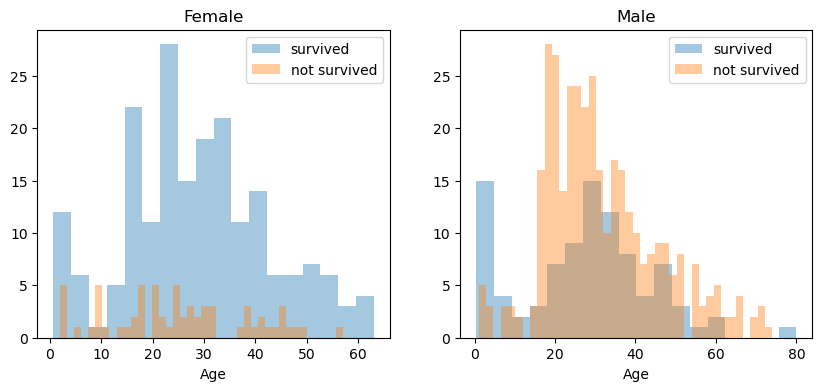

In [414]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [415]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

NameError: name 'train_df' is not defined